#BME3508 - Lecture 06
Fourier Transform The F-Domain

Cool video with special body suit
https://www.youtube.com/watch?v=Tb-sm05zJzQ

Website for suit

https://www.ottobock.com/en-gb/home-uk

### Lesson Link: [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/snsie/bme3508_Spring_2025/blob/main/Module2/Example_2.7.ipynb)


## **Example: Square Wave**

The square wave example in Section 2.7 illustrates the advantages of using the exponential form. The exponential form provides a simpler and more straightforward solution, and the consistent phase relationship between the different harmonics makes it easier to analyze and understand the Fourier series.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider

# Period and fundamental frequency:
T = 4        # period of the square wave
w0 = 2 * np.pi / T   # fundamental angular frequency, equals pi/2

# Define the square wave signal: +1 if t mod T < 2, otherwise -1.
def x_t(t):
    return np.where((t % T) < 2, 1, -1)

# Fourier series coefficient for k ≠ 0
def C_k(k):
    # Use the derived formula:
    # C_k = (2 * exp(-j*pi*k/2) * sin(pi*k/2)) / (pi*k)
    return (2 * np.exp(-1j * np.pi * k / 2) * np.sin(np.pi * k / 2)) / (np.pi * k)

# Fourier series approximation of x(t) using N harmonics (both positive and negative)
def fourier_series(t, N):
    result = np.zeros_like(t, dtype=complex)
    # For a balanced square wave, the DC term (C_0) is zero.
    for k in range(1, N + 1):
        ck = C_k(k)
        result += ck * np.exp(1j * k * w0 * t) + np.conjugate(ck) * np.exp(-1j * k * w0 * t)
    return result.real  # Return the real part since the signal is real

# Create a time vector covering several periods
t = np.linspace(-6, 6, 1000)

# Compute the original signal
x_orig = x_t(t)

# Function to update the plot based on slider value
def update_plot(N):
    x_approx = fourier_series(t, N)
    plt.figure(figsize=(10, 6))
    plt.plot(t, x_orig, 'k', label='Original square wave', linewidth=2)
    plt.plot(t, x_approx, label=f'Fourier series (N={N})', color='r')
    plt.xlabel('t')
    plt.ylabel('x(t)')
    plt.title('Square Wave and Its Fourier Series Approximation')
    plt.grid(True)
    plt.legend()
    plt.show()

# Create an interactive slider
interact(update_plot, N=IntSlider(min=1, max=30, step=1, value=3, description='Number of harmonics'));


interactive(children=(IntSlider(value=3, description='Number of harmonics', max=30, min=1), Output()), _dom_cl…

# **Choosing between Exponential and Trigonometric Forms**

## **Advantages of Exponential Form**

The complex exponential form of the Fourier series has several advantages over the trigonometric form:

$$
x(t) = \sum_{k=-\infty}^{\infty} c_k \cos(k\omega_0t) + d_k \sin(k\omega_0t)
$$

- **Simpler derivations**: Many Fourier series problems can be solved more easily using the exponential form, especially when dealing with time-domain functions that have even or odd symmetry.
- **Easier manipulation**: Exponential functions can be manipulated more easily than trigonometric functions, making it simpler to derive and analyze the Fourier series.
- **Consistent phase**: The exponential form provides a consistent phase relationship between the different harmonics, which can be useful in certain applications.

## **When to Use Complex Exponential Form**

- **Simplified calculations**: The complex exponential form simplifies the calculations, especially when dealing with differential equations and linear systems.
- **Symmetry properties**: It is particularly useful for signals with symmetry properties, as it can compactly represent both even and odd functions.
- **Frequency domain analysis**: The complex exponential form is more convenient for frequency domain analysis, making it easier to understand and manipulate the frequency components of the signal.
- **Signal processing**: In digital signal processing, the complex exponential form is often preferred due to its compatibility with the Fast Fourier Transform (FFT) algorithm.
- **Phase information**: It provides a clear representation of both magnitude and phase information, which is essential in many engineering applications.

## **When to Use Trigonometric Form**

- **Real-valued signals**: The trigonometric form is often more intuitive for real-valued signals, as it directly uses sine and cosine functions.
- **Physical interpretation**: It provides a clearer physical interpretation of the signal components, especially in mechanical and electrical engineering applications.
- **Boundary conditions**: When dealing with boundary conditions in partial differential equations, the trigonometric form can be more straightforward to apply.
- **Visualization**: It is easier to visualize and understand the contributions of individual sine and cosine terms in the trigonometric form.
- **Initial conditions**: For problems with specific initial conditions, the trigonometric form can sometimes offer a more direct approach to finding the solution.

## **Summary**

In summary, the exponential form of the Fourier series is often preferred over the trigonometric form due to its simpler derivations, easier manipulation, and consistent phase relationships.

$$
\therefore \quad \text{Exponential form is often the preferred choice for Fourier series analysis.}
$$


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider
import ipywidgets as widgets
from IPython.display import display, Math

# Set up matplotlib for LaTeX rendering
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'serif'
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'

# Define the square wave function
def square_wave(t, period=4):
    # Return 1 for first half of period, -1 for second half
    t_mod = t % period
    return np.where(t_mod < period/2, 1, -1)

# Function to plot the square wave and display equation
def plot_square_wave(period=4, amplitude=1, amplitude_offset=0, time_offset=0):
    # Generate a time vector
    t = np.linspace(-5, 5, 1000)  # 10 seconds with 1000 samples

    # Generate the square wave values with adjustments for amplitude and offsets
    y = amplitude * square_wave(t - time_offset, period) + amplitude_offset

    # Create figure with two subplots side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    # Plot the square wave
    ax1.plot(t, y)
    ax1.set_ylim(-2*amplitude, 2*amplitude)
    ax1.set_title(r'\textbf{Periodic Square Wave}')
    ax1.set_xlabel(r'$t$ (Time)')
    ax1.set_ylabel(r'$x(t)$ (Amplitude)')
    ax1.grid(True)

    # Display equation in the right subplot using LaTeX
    ax2.axis('off')
    
    # Add LaTeX equations to the right subplot - fixing the align environment syntax
    omega_0 = r'\frac{2\pi}{' + str(period) + r'}'
    
    # Create the equation text with parameters - using the format from file_context_0
    equation_text = r'''
    $$x(t) = \begin{cases} %g, & 0 \leq t < %g \\ %g, & %g \leq t < %g \end{cases}$$
    ''' % (amplitude, period/2, -amplitude, period/2, period)
    
    # Position the equation in the center of the right subplot
    ax2.text(0.5, 0.5, equation_text, 
             horizontalalignment='center', 
             verticalalignment='center',
             transform=ax2.transAxes, 
             fontsize=12)
    
    plt.tight_layout()
    plt.show()

# Create sliders and display them
period_slider = FloatSlider(value=4, min=0.1, max=10, step=0.1, description='Period:')
amplitude_slider = FloatSlider(value=1, min=0.1, max=5, step=0.1, description='Amplitude:')
amplitude_offset_slider = FloatSlider(value=0, min=-5, max=5, step=0.1, description='Amplitude Offset:')
time_offset_slider = FloatSlider(value=0, min=-5, max=5, step=0.1, description='Time Offset:')

# Use interact to create interactive sliders
interact(plot_square_wave,
         period=period_slider,
         amplitude=amplitude_slider,
         amplitude_offset=amplitude_offset_slider,
         time_offset=time_offset_slider);

interactive(children=(FloatSlider(value=4.0, description='Period:', max=10.0, min=0.1), FloatSlider(value=1.0,…

<>:120: SyntaxWarning: invalid escape sequence '\s'
<>:120: SyntaxWarning: invalid escape sequence '\c'
<>:120: SyntaxWarning: invalid escape sequence '\s'
<>:120: SyntaxWarning: invalid escape sequence '\c'
C:\Users\siege\AppData\Local\Temp\ipykernel_2664\3110025402.py:120: SyntaxWarning: invalid escape sequence '\s'
  terms.append(f'{b_n:.4f} \sin({n} \cdot {omega_0:.4f} t)')
C:\Users\siege\AppData\Local\Temp\ipykernel_2664\3110025402.py:120: SyntaxWarning: invalid escape sequence '\c'
  terms.append(f'{b_n:.4f} \sin({n} \cdot {omega_0:.4f} t)')


interactive(children=(FloatSlider(value=4.0, description='Period:', max=10.0, min=0.1), FloatSlider(value=1.0,…

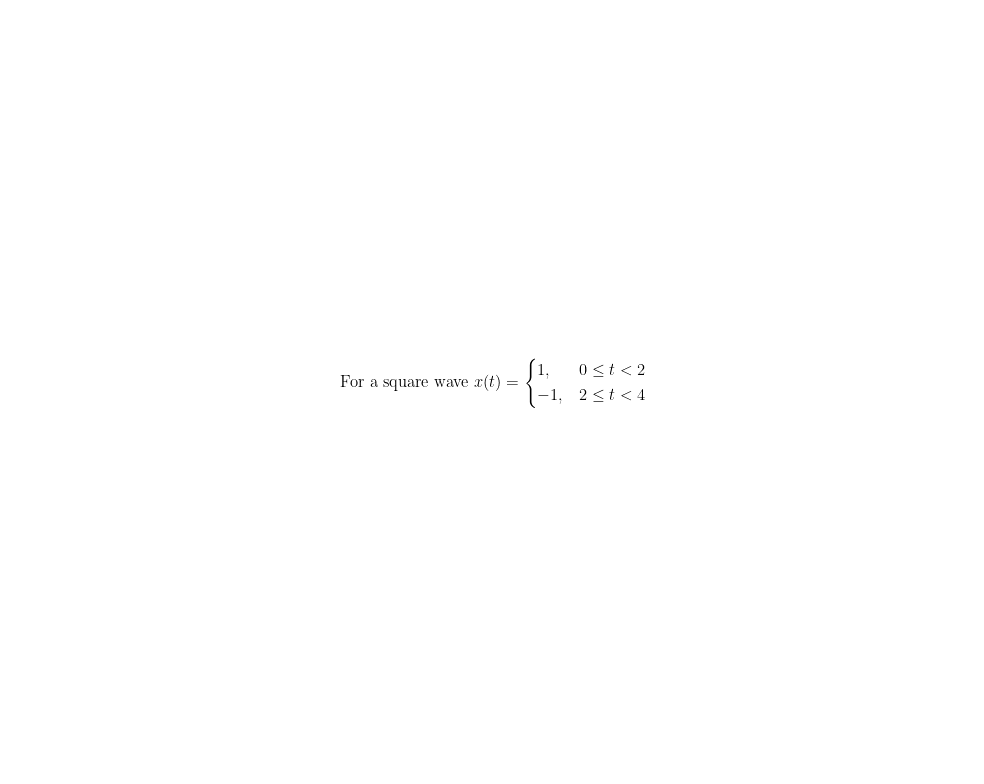

interactive(children=(IntSlider(value=10, description='Harmonics (N):', max=30, min=1), FloatSlider(value=4.0,…

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, IntSlider
import ipywidgets as widgets
from IPython.display import display, Math

# Set up matplotlib for LaTeX rendering
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'serif'
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'

# Define the square wave function
def square_wave(t, period=4):
    # Return 1 for first half of period, -1 for second half
    t_mod = t % period
    return np.where(t_mod < period/2, 1, -1)

# Function to calculate Fourier coefficients for square wave
def square_wave_fourier_coefficients(n, period=4, amplitude=1):
    # For square wave, a_0 = 0 (no DC component for symmetric square wave)
    a_0 = 0
    
    # For square wave, a_n = 0 for all n (no cosine terms due to odd symmetry)
    a_n = 0
    
    # For square wave, b_n = (4*amplitude/n*pi) for odd n, 0 for even n
    if n % 2 == 1:  # odd n
        b_n = (4 * amplitude) / (n * np.pi)
    else:  # even n
        b_n = 0
        
    return a_0, a_n, b_n

# Function to compute the Fourier series approximation
def fourier_approximation(t, N, period=4, amplitude=1):
    omega_0 = 2 * np.pi / period
    result = 0
    
    # Add each harmonic contribution
    for n in range(1, N+1):
        a_0, a_n, b_n = square_wave_fourier_coefficients(n, period, amplitude)
        if n == 1:  # First harmonic
            result += b_n * np.sin(n * omega_0 * t)
        else:  # Higher harmonics
            result += b_n * np.sin(n * omega_0 * t)
    
    return result

# Function to plot the square wave and display equation
def plot_square_wave(period=4, amplitude=1, amplitude_offset=0, time_offset=0):
    # Generate a time vector
    t = np.linspace(-5, 5, 1000)  # 10 seconds with 1000 samples

    # Generate the square wave values with adjustments for amplitude and offsets
    y = amplitude * square_wave(t - time_offset, period) + amplitude_offset

    # Create figure with two subplots side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    # Plot the square wave
    ax1.plot(t, y)
    ax1.set_ylim(-2*amplitude, 2*amplitude)
    ax1.set_title(r'\textbf{Periodic Square Wave}')
    ax1.set_xlabel(r'$t$ (Time)')
    ax1.set_ylabel(r'$x(t)$ (Amplitude)')
    ax1.grid(True)

    # Display equation in the right subplot using LaTeX
    ax2.axis('off')
    
    # Add LaTeX equations to the right subplot - fixing the align environment syntax
    omega_0 = r'\frac{2\pi}{' + str(period) + r'}'
    
    # Create the equation text with parameters - using the format from file_context_0
    equation_text = r'''
    $$x(t) = \begin{cases} %g, & 0 \leq t < %g \\ %g, & %g \leq t < %g \end{cases}$$
    ''' % (amplitude, period/2, -amplitude, period/2, period)
    
    # Position the equation in the center of the right subplot
    ax2.text(0.5, 0.5, equation_text, 
             horizontalalignment='center', 
             verticalalignment='center',
             transform=ax2.transAxes, 
             fontsize=12)
    
    plt.tight_layout()
    plt.show()

# Function to plot Fourier series approximation
def plot_fourier_approximation(N=3, period=4, amplitude=1):
    # Generate a time vector
    t = np.linspace(-period, period, 1000)
    
    # Generate the exact square wave
    exact = amplitude * square_wave(t, period)
    
    # Generate the Fourier approximation
    approx = fourier_approximation(t, N, period, amplitude)
    
    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(t, exact, 'k--', label='Exact Square Wave')
    plt.plot(t, approx, 'r-', label=f'Fourier Series (N={N})')
    plt.title(r'\textbf{Square Wave Fourier Series Approximation}')
    plt.xlabel(r'$t$ (Time)')
    plt.ylabel(r'$x(t)$ (Amplitude)')
    plt.grid(True)
    plt.legend()
    plt.ylim(-1.5*amplitude, 1.5*amplitude)
    
    # Display the Fourier series equation
    omega_0 = 2 * np.pi / period
    equation = r'$x(t) \approx '
    
    terms = []
    for n in range(1, N+1):
        _, _, b_n = square_wave_fourier_coefficients(n, period, amplitude)
        if abs(b_n) > 1e-10:  # Only include non-zero terms
            terms.append(f'{b_n:.4f} \sin({n} \cdot {omega_0:.4f} t)')
    
    equation += ' + '.join(terms) + '$'
    
    plt.figtext(0.5, 0.01, equation, ha='center', fontsize=12)
    plt.tight_layout()
    plt.show()

# Function to demonstrate Fourier coefficient derivation
def show_fourier_derivation(period=4, amplitude=1):
    # Create figure with equations
    fig, ax = plt.subplots(figsize=(10, 8))
    ax.axis('off')
    
    # Define the square wave for this period and amplitude
    omega_0 = 2 * np.pi / period
    
    # Derivation text with real-time calculations
    derivation_text = r'''$$\text{For a square wave } x(t) = \begin{cases}    %g, & 0 \leq t < %g \\ %g, & %g \leq t < %g \end{cases}\\$$
    $$\text{with period } T_0 = %g\\$$
    $$\text{and } \omega_0 = \frac{2\pi}{T_0} = \frac{2\pi}{%g} = %g\\$$
    $$\textbf{Step 1: Calculate $a_0$ (DC component)}$$
    $$a_0 = \frac{1}{T_0}\int_0^{T_0} x(t) dt\\$$
    $$= \frac{1}{%g}\left[\int_0^{%g} %g \, dt + \int_{%g}^{%g} %g \, dt\right]\\$$
    $$= \frac{1}{%g}\left[%g \cdot %g + %g \cdot %g\right]\\$$
    $$= \frac{1}{%g}\left[%g + %g\right]\\$$
    $$= \frac{%g}{%g} = %g$$
    $$\textbf{Step 2: Calculate $a_n$ (cosine coefficients)}$$
    $$a_n = \frac{2}{T_0}\int_0^{T_0} x(t)\cos(n\omega_0 t) dt\\$$
    $$= \frac{2}{%g}\left[\int_0^{%g} %g \cos(n \cdot %g \cdot t) dt + \int_{%g}^{%g} %g \cos(n \cdot %g \cdot t) dt\right]$$
    $$\text{For all $n$, due to the symmetry of the square wave, $a_n = 0$}$$
    $$\textbf{Step 3: Calculate $b_n$ (sine coefficients)}$$
    $$b_n = \frac{2}{T_0}\int_0^{T_0} x(t)\sin(n\omega_0 t) dt\\$$
    $$= \frac{2}{%g}\left[\int_0^{%g} %g \sin(n \cdot %g \cdot t) dt + \int_{%g}^{%g} %g \sin(n \cdot %g \cdot t) dt\right]\\$$
    $$= \frac{2}{%g}\left[%g \cdot \frac{-\cos(n\omega_0 t)}{n\omega_0}\bigg|_0^{%g} + %g \cdot \frac{-\cos(n\omega_0 t)}{n\omega_0}\bigg|_{%g}^{%g}\right]\\$$
    $$\text{For odd $n$: $b_n = \frac{4A}{n\pi} = \frac{4 \cdot %g}{n\pi} = \frac{%g}{n\pi}$}$$
    $$\text{For even $n$: $b_n = 0$}$$
    $$\textbf{Final Fourier Series:}$$
    $$x(t) = %g + \sum_{n=1}^{\infty} \left[0 \cdot \cos(n\omega_0 t) + b_n \sin(n\omega_0 t)\right]\\$$
    $$= %g + \sum_{n=1,3,5,...}^{\infty} \frac{%g}{n\pi} \sin(n\omega_0 t)\\$$
    $$= %g + \frac{%g}{\pi}\left[\sin(\omega_0 t) + \frac{1}{3}\sin(3\omega_0 t) + \frac{1}{5}\sin(5\omega_0 t) + \ldots\right]$$
    ''' % (
        amplitude, period/2, -amplitude, period/2, period,  # Square wave definition
        period,  # T_0
        period, omega_0,  # omega_0 calculation
        period,  # a_0 calculation
        period/2, amplitude, period/2, period, -amplitude,
        period, amplitude, period/2, -amplitude, period/2,
        period, amplitude * period/2, -amplitude * period/2,
        0, period, 0,  # a_0 result
        period,  # a_n calculation
        period/2, amplitude, omega_0, period/2, period, -amplitude, omega_0,
        
        period,  # b_n calculation
        period/2, amplitude, omega_0, period/2, period, -amplitude, omega_0,
        period, amplitude, period/2, -amplitude, period/2, period,
        
        amplitude, 4*amplitude,  # b_n for odd n
        
        0,  # Final series
        0, 4*amplitude,
        0, 4*amplitude
    )
    
    # Position the derivation in the center of the figure
    ax.text(0.5, 0.5, derivation_text, 
            horizontalalignment='center', 
            verticalalignment='center',
            transform=ax.transAxes, 
            fontsize=12)
    
    plt.tight_layout()
    plt.show()

# Function to plot interactive Fourier series approximation
def plot_interactive_fourier(N=10, period=4, amplitude=1):
    # Generate a time vector
    t = np.linspace(-period, period, 1000)
    
    # Generate the exact square wave
    exact = amplitude * square_wave(t, period)
    
    # Generate the Fourier approximation
    approx = fourier_approximation(t, N, period, amplitude)
    
    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(t, exact, 'k--', label='Exact Square Wave')
    plt.plot(t, approx, 'r-', label=f'Fourier Series (N={N})')
    plt.title(r'\textbf{Square Wave Fourier Series Approximation}')
    plt.xlabel(r'$t$ (Time)')
    plt.ylabel(r'$x(t)$ (Amplitude)')
    plt.grid(True)
    plt.legend()
    plt.ylim(-1.5*amplitude, 1.5*amplitude)
    plt.show()

# Create sliders and display them
period_slider = FloatSlider(value=4, min=0.1, max=10, step=0.1, description='Period:')
amplitude_slider = FloatSlider(value=1, min=0.1, max=5, step=0.1, description='Amplitude:')
amplitude_offset_slider = FloatSlider(value=0, min=-5, max=5, step=0.1, description='Amplitude Offset:')
time_offset_slider = FloatSlider(value=0, min=-5, max=5, step=0.1, description='Time Offset:')

# Use interact to create interactive sliders
interact(plot_square_wave,
         period=period_slider,
         amplitude=amplitude_slider,
         amplitude_offset=amplitude_offset_slider,
         time_offset=time_offset_slider);

# Display the Fourier coefficient derivation
show_fourier_derivation(period=4, amplitude=1)

# Create interactive Fourier series approximation
harmonics_slider = IntSlider(value=10, min=1, max=30, description='Harmonics (N):')
period_slider_fourier = FloatSlider(value=4, min=0.1, max=10, step=0.1, description='Period:')
amplitude_slider_fourier = FloatSlider(value=1, min=0.1, max=5, step=0.1, description='Amplitude:')

interact(plot_interactive_fourier,
         N=harmonics_slider,
         period=period_slider_fourier,
         amplitude=amplitude_slider_fourier);

## **3. Derivation of Trigonometric Fourier Series Coefficients**

To derive the trigonometric Fourier series coefficients for the square wave, we follow these steps:

### **Step 1: Fourier Series Representation**

The trigonometric Fourier series representation of a periodic function $x(t)$ with period $T_0$ is given by:

$$
x(t) = a_0 + \sum_{n=1}^{\infty} \left( a_n \cos(n \omega_0 t) + b_n \sin(n \omega_0 t) \right)
$$

where:

- $a_0$ is the DC component (average value of the function over one period).
- $a_n$ and $b_n$ are the Fourier coefficients.
- $\omega_0 = \frac{2\pi}{T_0}$ is the fundamental angular frequency.

### **Step 2: Coefficient Formulas**

The coefficients $a_0$, $a_n$, and $b_n$ are calculated as follows:

#### **DC Component $a_0$**

$$
a_0 = \frac{1}{T_0} \int_0^{T_0} x(t) \, dt
$$

#### **Cosine Coefficients $a_n$**

$$
a_n = \frac{2}{T_0} \int_0^{T_0} x(t) \cos(n \omega_0 t) \, dt
$$

#### **Sine Coefficients $b_n$**

$$
b_n = \frac{2}{T_0} \int_0^{T_0} x(t) \sin(n \omega_0 t) \, dt
$$

### **Step 3: Calculate $a_0$**

For the given square wave:

$$
x(t) = \begin{cases}
1, & 0 \leq t < 2 \\
-1, & 2 \leq t < 4
\end{cases}
$$

The period $T_0 = 4$.

$$
a_0 = \frac{1}{4} \left( \int_0^2 1 \, dt + \int_2^4 (-1) \, dt \right)
$$

Calculate the integrals:

$$
a_0 = \frac{1}{4} \left( \left[ t \right]_0^2 + \left[ -t \right]_2^4 \right)
$$

$$
a_0 = \frac{1}{4} \left( 2 - 0 + (-4 + 2) \right)
$$

$$
a_0 = \frac{1}{4} \left( 2 - 2 \right) = 0
$$

### **Step 4: Calculate $a_n$**

$$
a_n = \frac{2}{4} \left( \int_0^2 \cos(n \omega_0 t) \, dt + \int_2^4 (-\cos(n \omega_0 t)) \, dt \right)
$$

$$
a_n = \frac{1}{2} \left( \int_0^2 \cos\left(\frac{n \pi t}{2}\right) \, dt - \int_2^4 \cos\left(\frac{n \pi t}{2}\right) \, dt \right)
$$

Calculate the integrals:

$$
a_n = \frac{1}{2} \left( \left[ \frac{2}{n \pi} \sin\left(\frac{n \pi t}{2}\right) \right]_0^2 - \left[ \frac{2}{n \pi} \sin\left(\frac{n \pi t}{2}\right) \right]_2^4 \right)
$$

$$
a_n = \frac{1}{n \pi} \left( \sin(n \pi) - \sin(0) - \sin(2 n \pi) + \sin(n \pi) \right)
$$

Since $\sin(n \pi) = 0$ and $\sin(2 n \pi) = 0$:

$$
a_n = 0
$$

### **Step 5: Calculate $b_n$**

$$
b_n = \frac{2}{4} \left( \int_0^2 \sin(n \omega_0 t) \, dt + \int_2^4 (-\sin(n \omega_0 t)) \, dt \right)
$$

$$
b_n = \frac{1}{2} \left( \int_0^2 \sin\left(\frac{n \pi t}{2}\right) \, dt - \int_2^4 \sin\left(\frac{n \pi t}{2}\right) \, dt \right)
$$

Calculate the integrals:

$$
b_n = \frac{1}{2} \left( \left[ -\frac{2}{n \pi} \cos\left(\frac{n \pi t}{2}\right) \right]_0^2 - \left[ -\frac{2}{n \pi} \cos\left(\frac{n \pi t}{2}\right) \right]_2^4 \right)
$$

$$
b_n = \frac{1}{n \pi} \left( \cos(0) - \cos(n \pi) - \cos(n \pi) + \cos(2 n \pi) \right)
$$

Since $\cos(0) = 1$, $\cos(n \pi) = (-1)^n$, and $\cos(2 n \pi) = 1$:

$$
b_n = \frac{1}{n \pi} \left( 1 - (-1)^n - (-1)^n + 1 \right)
$$

$$
b_n = \frac{1}{n \pi} \left( 2 - 2(-1)^n \right)
$$

For odd $n$:

$$
b_n = \frac{1}{n \pi} \left( 2 - 2(-1) \right) = \frac{4}{n \pi}
$$

For even $n$:

$$
b_n = \frac{1}{n \pi} \left( 2 - 2(1) \right) = 0
$$

### **Summary of Coefficients**

- $a_0 = 0$
- $a_n = 0$
- $b_n = \frac{4}{n \pi}$ for odd $n$
- $b_n = 0$ for even $n$

### **Final Trigonometric Fourier Series**

The trigonometric Fourier series for the square wave is:

$$
x(t) = \sum_{\substack{n=1 \\ n \text{ odd}}}^{\infty} \frac{4}{n \pi} \sin\left(\frac{n \pi t}{2}\right)
$$


## **Derivation of Complex Exponential Fourier Series Coefficients**

To derive the complex exponential Fourier series coefficients for a periodic function, we follow these steps:

### **Step 1: Fourier Series Representation**

The complex exponential Fourier series representation of a periodic function $x(t)$ with period $T_0$ is given by:

$$
x(t) = \sum_{k=-\infty}^{\infty} C_k e^{j k \omega_0 t}
$$

where:

- $C_k$ are the complex Fourier coefficients.
- $\omega_0 = \frac{2\pi}{T_0}$ is the fundamental angular frequency.

### **Step 2: Coefficient Formula**

The coefficients $C_k$ are calculated as follows:

$$
C_k = \frac{1}{T_0} \int_0^{T_0} x(t) e^{-j k \omega_0 t} \, dt
$$

### **Step 3: Calculate $C_k$ for a Square Wave**

For the given square wave:

$$
x(t) = \begin{cases}
1, & 0 \leq t < 2 \\
-1, & 2 \leq t < 4
\end{cases}
$$

The period $T_0 = 4$.

$$
C_k = \frac{1}{4} \left( \int_0^2 1 \cdot e^{-j k \frac{\pi}{2} t} \, dt + \int_2^4 (-1) \cdot e^{-j k \frac{\pi}{2} t} \, dt \right)
$$

### **Step 4: Evaluate the Integrals**

Evaluate the first integral:

$$
\int_0^2 e^{-j k \frac{\pi}{2} t} \, dt = \left[ \frac{-2}{j k \pi} e^{-j k \frac{\pi}{2} t} \right]_0^2 = \frac{-2}{j k \pi} \left( e^{-j k \pi} - 1 \right)
$$

Since $e^{-j k \pi} = (-1)^k$:

$$
\int_0^2 e^{-j k \frac{\pi}{2} t} \, dt = \frac{-2}{j k \pi} \left( (-1)^k - 1 \right)
$$

Evaluate the second integral:

$$
\int_2^4 e^{-j k \frac{\pi}{2} t} \, dt = \left[ \frac{-2}{j k \pi} e^{-j k \frac{\pi}{2} t} \right]_2^4 = \frac{-2}{j k \pi} \left( e^{-j 2 k \pi} - e^{-j k \pi} \right)
$$

Since $e^{-j 2 k \pi} = 1$ and $e^{-j k \pi} = (-1)^k$:

$$
\int_2^4 e^{-j k \frac{\pi}{2} t} \, dt = \frac{-2}{j k \pi} \left( 1 - (-1)^k \right)
$$

### **Step 5: Combine the Results**

Combine the results of the integrals:

$$
C_k = \frac{1}{4} \left( \frac{-2}{j k \pi} \left( (-1)^k - 1 \right) + \frac{2}{j k \pi} \left( 1 - (-1)^k \right) \right)
$$

$$
C_k = \frac{1}{4} \cdot \frac{-2}{j k \pi} \left( (-1)^k - 1 - 1 + (-1)^k \right)
$$

$$
C_k = \frac{1}{4} \cdot \frac{-2}{j k \pi} \left( 2(-1)^k - 2 \right)
$$

$$
C_k = \frac{1}{4} \cdot \frac{-4}{j k \pi} \left( (-1)^k - 1 \right)
$$

$$
C_k = \frac{-1}{j k \pi} \left( (-1)^k - 1 \right)
$$

### **Step 6: Simplify the Expression**

For odd $k$:

$$
(-1)^k - 1 = -2
$$

$$
C_k = \frac{-1}{j k \pi} \cdot (-2) = \frac{2}{j k \pi} = \frac{-2j}{k \pi}
$$

For even $k$:

$$
(-1)^k - 1 = 0
$$

$$
C_k = 0
$$

### **Summary of Coefficients**

- $C_k = \frac{-2j}{k \pi}$ for odd $k$
- $C_k = 0$ for even $k$

### **Final Complex Exponential Fourier Series**

The complex exponential Fourier series for the square wave is:

$$
x(t) = \sum_{\substack{k=-\infty \\ k \text{ odd}}}^{\infty} \frac{-2j}{k \pi} e^{j k \frac{\pi}{2} t}
$$


### Next: Evaluate $ D_k $ for $ k = 0, \pm1, \pm2, \pm3 $ (first three harmonics) and find $ D_k $ & $ \angle D_k $

To evaluate $ D_k $ for different values of $ k $, we use the formula:

$$ D_k = \frac{1}{2 j \pi k} \left( e^{-j 2 \pi k} - 1 \right) $$

Now, we substitute the values of $ k = 0, \pm1, \pm2, \pm3 $ to compute $ D_k $ for the first three harmonics.

#### For $ k = 0 $:

$$
D_0 = \frac{1}{2 j \pi 0} \left( e^{-j 2 \pi 0} - 1 \right) = 0
$$

#### For $ k = \pm 1 $:

$$
D_1 = \frac{1}{2 j \pi 1} \left( e^{-j 2 \pi 1} - 1 \right) = \frac{1}{2 j \pi} \left( -1 - 1 \right) = \frac{-2}{2 j \pi} = \frac{-1}{j \pi}
$$

Similarly, for $ k = -1 $, we get:

$$
D_{-1} = \frac{-1}{j \pi}
$$

#### For $ k = \pm 2 $:

$$
D_2 = \frac{1}{2 j \pi 2} \left( e^{-j 2 \pi 2} - 1 \right) = \frac{1}{4 j \pi} \left( 1 - 1 \right) = 0
$$

Similarly, for $ k = -2 $, we get:

$$
D_{-2} = 0
$$

#### For $ k = \pm 3 $:

$$
D_3 = \frac{1}{2 j \pi 3} \left( e^{-j 2 \pi 3} - 1 \right) = \frac{1}{6 j \pi} \left( -1 - 1 \right) = \frac{-2}{6 j \pi} = \frac{-1}{3 j \pi}
$$

Similarly, for $ k = -3 $, we get:

$$
D_{-3} = \frac{-1}{3 j \pi}
$$

#### Phase of $ D_k $ ($ \angle D_k $):

To find the phase $ \angle D_k $, we can calculate the argument (angle) of the complex numbers:

For $ k = \pm 1 $:

$$
\angle D_1 = \angle \left( \frac{-1}{j \pi} \right) = -90^\circ
$$

For $ k = -1 $:

$$
\angle D_{-1} = \angle \left( \frac{-1}{j \pi} \right) = -90^\circ
$$

For $ k = \pm 3 $:

$$
\angle D_3 = \angle \left( \frac{-1}{3 j \pi} \right) = -90^\circ
$$

For $ k = -3 $:

$$
\angle D_{-3} = \angle \left( \frac{-1}{3 j \pi} \right) = -90^\circ
$$

Thus, for all values of $ k $, we observe that $ D_k $ has a phase of $ -90^\circ $ for $ k \neq 0 $.


### Step 4: Plug $ D_k $ into the Fourier Series

The Fourier Series for a periodic function $ x(t) $ is given by:

$$
x(t) = \sum_{k=-\infty}^{\infty} D_k e^{j k \omega_0 t}
$$

Where $ D_k $ are the Fourier coefficients, and $ \omega_0 $ is the fundamental frequency.

The Fourier Series representation of $ x(t) $ is:

$$
x(t) = \sum_{k=-\infty}^{\infty} D_k e^{j k \omega_0 t}
$$

Substituting the formula for $ D_k $:

$$
D_k = \frac{1}{2 j \pi k} \left( e^{-j 2 \pi k} - 1 \right)
$$

we get:

$$
x(t) = \sum_{k=-\infty}^{\infty} \frac{1}{2 j \pi k} \left( e^{-j 2 \pi k} - 1 \right) e^{j k \omega_0 t}
$$

### Step 5: Substitute $ D_k $ for $ k = 0, \pm1, \pm2, \pm3 $

Remember that computationally we would have skipped finding each coeffecient given the computer can do this for us with the formula, but given we did it by hand rather than trying to calculate the entirety of the expression at once we had precalculated the $D_k$ values for 1, -1, 2, -2, 3, -3.

From the previous steps, we have the following values for $ D_k $:

- $ D_0 = 0 $
- $ D\_{\pm 1} = \frac{-1}{j \pi} $
- $ D\_{\pm 2} = 0 $
- $ D\_{\pm 3} = \frac{-1}{3 j \pi} $

Substitute these values into the Fourier Series equation:

$$
x(t) = \sum_{k=-\infty}^{\infty} D_k e^{j k \omega_0 t}
$$

For the first three harmonics (considering only $ k = 0, \pm1, \pm2, \pm3 $), the series becomes:

$$
x(t) = D_0 e^{j 0 \omega_0 t} + D_1 e^{j \omega_0 t} + D_{-1} e^{-j \omega_0 t} + D_2 e^{j 2 \omega_0 t} + D_{-2} e^{-j 2 \omega_0 t} + D_3 e^{j 3 \omega_0 t} + D_{-3} e^{-j 3 \omega_0 t}
$$

Now, substitute the values of $ D_k $:

$$
x(t) = 0 \cdot e^{j 0 \omega_0 t} + \frac{-1}{j \pi} e^{j \omega_0 t} + \frac{-1}{j \pi} e^{-j \omega_0 t} + 0 \cdot e^{j 2 \omega_0 t} + 0 \cdot e^{-j 2 \omega_0 t} + \frac{-1}{3 j \pi} e^{j 3 \omega_0 t} + \frac{-1}{3 j \pi} e^{-j 3 \omega_0 t}
$$

This simplifies to:

$$
x(t) = \frac{-1}{j \pi} \left( e^{j \omega_0 t} + e^{-j \omega_0 t} \right) + \frac{-1}{3 j \pi} \left( e^{j 3 \omega_0 t} + e^{-j 3 \omega_0 t} \right)
$$

This is the complete Fourier Series for the given function $ x(t) $.


In [36]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider, FloatSlider
import ipywidgets as widgets

# Define the period and fundamental angular frequency
T = 4                     # Period of the square wave
w0 = 2 * np.pi / T        # Fundamental angular frequency (pi/2)

# Define the square wave signal
def x_t(t, T):
    # Returns +1 if t mod T < 2, otherwise -1
    return np.where((t % T) < (T / 2), 1, -1)

# Define the Fourier coefficients for the exponential Fourier series
def C(k):
    if k == 0:
        return 0.0
    return (2 * np.exp(-1j * np.pi * k / 2) * np.sin(np.pi * k / 2)) / (np.pi * k)

# Define the Fourier series approximation using exponential form
def fourier_series_exp(t, N, T):
    w0 = 2 * np.pi / T
    result = np.zeros_like(t, dtype=complex)
    for k in range(-N, N + 1):
        result += C(k) * np.exp(1j * k * w0 * t)
    return result.real  # Return real part because the original signal is real

# Function to update the plot
def update_plot(N, T):
    t = np.linspace(-6, 6, 1000)
    x_original = x_t(t, T)

    plt.figure(figsize=(10, 6))
    plt.plot(t, x_original, 'k', label='Original square wave', linewidth=2)

    x_approx = fourier_series_exp(t, N, T)
    plt.plot(t, x_approx, label=f'Exponential Fourier series (N={N})')

    plt.xlabel('Time t')
    plt.ylabel('x(t)')
    plt.title('Square Wave and Its Exponential Fourier Series Approximation')
    plt.legend()
    plt.grid(True)
    plt.show()

# Create sliders
N_slider = IntSlider(value=10, min=1, max=100, step=1, description='Harmonics (N):')
T_slider = FloatSlider(value=4, min=1, max=10, step=0.1, description='Period (T):')

# Use interact to create interactive sliders
interact(update_plot, N=N_slider, T=T_slider);

interactive(children=(IntSlider(value=10, description='Harmonics (N):', min=1), FloatSlider(value=4.0, descrip…